<a href="https://colab.research.google.com/github/HenriqueCCdA/bootCampAluraDataScience/blob/master/modulo2/aula/boot_camp_modulo2_aula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# pandas configuracao
pd.options.display.float_format  ="{:.2f}".format

In [ ]:
uri = "https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv"

dados = pd.read_csv(uri, 
                    encoding="ISO-8859-1",
                    skiprows = 3, sep=";", 
                    skipfooter=12,
                    thousands=".",
                    decimal=",",
                    engine='python')

In [ ]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
dados_usaveis = dados[colunas_usaveis]
dados_usaveis = dados_usaveis.set_index("Unidade da Federação")
dados_usaveis.head().iloc[:,:5]

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez
Unidade da Federação,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43


In [ ]:
dados_usaveis["Total"] = dados_usaveis.sum(axis=1)
dados_usaveis.head(n=1)
ordenado_por_total = dados_usaveis.sort_values("Total", ascending=False)/1e6
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
ordenado_por_total.head(5).iloc[:,:5]

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez
Unidade da Federação,,,,,
35 São Paulo,1.67,4.43,14.58,35.03,76.67
31 Minas Gerais,0.97,2.86,10.02,21.73,43.43
41 Paraná,0.55,1.43,4.63,11.12,28.79
43 Rio Grande do Sul,1.05,3.18,8.57,16.59,30.13
33 Rio de Janeiro,0.47,0.92,2.99,7.25,13.63


In [ ]:
mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2020/Jul'

In [ ]:
gastos_do_ultimo_mes = ordenado_por_total[mes_mais_recente]

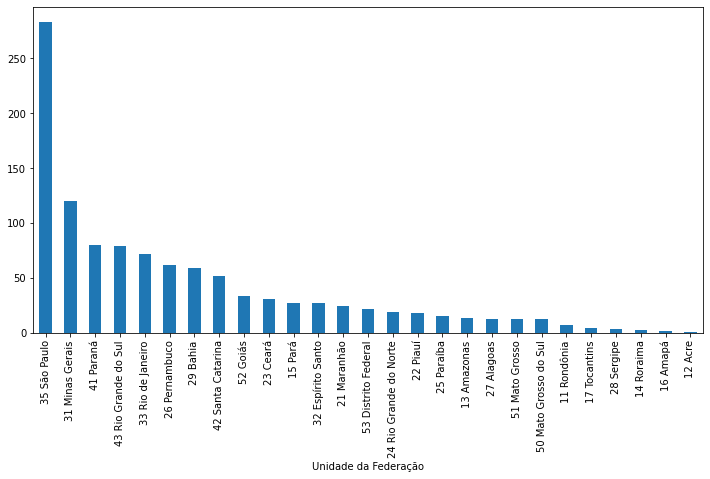

In [ ]:
gastos_mais_recentes = gastos_do_ultimo_mes.sort_values(ascending=False)
gastos_mais_recentes.plot(kind='bar', figsize = (12, 6))

In [ ]:
gastos_proporcionais_por_estados = gastos_mais_recentes / gastos_mais_recentes.sum()

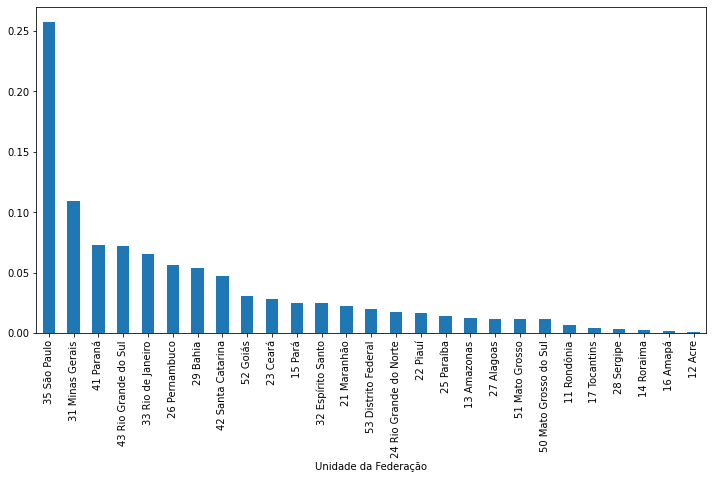

In [ ]:
gastos_proporcionais_por_estados.plot(kind='bar', figsize = (12, 6))

In [ ]:
uri = "https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls"

ibge_estimativa = pd.read_excel(uri,skiprows=1)
ibge_estimativa.head()

,BRASIL E UNIDADES DA FEDERAÇÃO,Unnamed: 1,POPULAÇÃO ESTIMADA
0,Brasil,nan,211755692
1,Região Norte,nan,18672591
2,Rondônia,nan,1796460
3,Acre,nan,894470
4,Amazonas,nan,4207714


In [ ]:
dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	 Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)
"""

In [ ]:
from io import StringIO

dados_da_populacao_io = StringIO(dados_da_populacao)

populacao = pd.read_csv(dados_da_populacao_io, sep="\t")

populacao = populacao.dropna()

populacao["populacao"] = populacao["População"].str.replace(" ", "").astype(int)
populacao["uf"] = populacao["Unidade federativa"]
populacao =  populacao[["populacao", "uf"]].set_index("uf")
display(populacao.head())
display(populacao.info())

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries,  São Paulo to  Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


None

In [ ]:
gastos_mais_recentes.head()

Unidade da Federação
35 São Paulo           282.71
31 Minas Gerais        120.47
41 Paraná               80.32
43 Rio Grande do Sul    78.93
33 Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

In [ ]:
populacao

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840
Rio Grande do Sul,11422973
Pernambuco,9616621
Ceará,9187103
Pará Pará,8690745


In [ ]:
populacao.join(gastos_mais_recentes)

,populacao,2020/Jul
uf,,
São Paulo,46289333,nan
Minas Gerais,21292666,nan
Rio de Janeiro,17366189,nan
Bahia Bahia,14930634,nan
Paraná,11516840,nan
Rio Grande do Sul,11422973,nan
Pernambuco,9616621,nan
Ceará,9187103,nan
Pará Pará,8690745,nan


In [ ]:
gastos_mais_recentes.index = gastos_mais_recentes.index.str[3:]
gastos_mais_recentes.index

Index(['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Pernambuco', 'Bahia', 'Santa Catarina', 'Goiás',
       'Ceará', 'Pará', 'Espírito Santo', 'Maranhão', 'Distrito Federal',
       'Rio Grande do Norte', 'Piauí', 'Paraíba', 'Amazonas', 'Alagoas',
       'Mato Grosso', 'Mato Grosso do Sul', 'Rondônia', 'Tocantins', 'Sergipe',
       'Roraima', 'Amapá', 'Acre'],
      dtype='object', name='Unidade da Federação')

In [ ]:
populacao.join(gastos_mais_recentes)

,populacao,2020/Jul
uf,,
São Paulo,46289333,nan
Minas Gerais,21292666,nan
Rio de Janeiro,17366189,nan
Bahia Bahia,14930634,nan
Paraná,11516840,nan
Rio Grande do Sul,11422973,nan
Pernambuco,9616621,nan
Ceará,9187103,nan
Pará Pará,8690745,nan


In [ ]:
populacao.index

Index([' São Paulo', ' Minas Gerais', ' Rio de Janeiro', ' Bahia Bahia',
       ' Paraná', ' Rio Grande do Sul', ' Pernambuco', ' Ceará', 'Pará Pará',
       ' Santa Catarina', ' Maranhão', ' Goiás', ' Amazonas',
       ' Espírito Santo', ' Paraíba', ' Rio Grande do Norte', ' Mato Grosso',
       ' Alagoas', ' Piauí', ' Distrito Federal', ' Mato Grosso do Sul',
       ' Sergipe', ' Rondônia', ' Tocantins', ' Acre', ' Amapá', ' Roraima'],
      dtype='object', name='uf')

In [ ]:
populacao.index = populacao.index.str.strip()
populacao.index


Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará Pará',
       'Santa Catarina', 'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo',
       'Paraíba', 'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [ ]:
gastos_mais_recentes.index

Index(['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Pernambuco', 'Bahia', 'Santa Catarina', 'Goiás',
       'Ceará', 'Pará', 'Espírito Santo', 'Maranhão', 'Distrito Federal',
       'Rio Grande do Norte', 'Piauí', 'Paraíba', 'Amazonas', 'Alagoas',
       'Mato Grosso', 'Mato Grosso do Sul', 'Rondônia', 'Tocantins', 'Sergipe',
       'Roraima', 'Amapá', 'Acre'],
      dtype='object', name='Unidade da Federação')

In [ ]:
populacao.join(gastos_mais_recentes)

,populacao,2020/Jul
uf,,
São Paulo,46289333,282.71
Minas Gerais,21292666,120.47
Rio de Janeiro,17366189,71.54
Bahia Bahia,14930634,nan
Paraná,11516840,80.32
Rio Grande do Sul,11422973,78.93
Pernambuco,9616621,62.33
Ceará,9187103,30.81
Pará Pará,8690745,nan


In [ ]:
for estado in gastos_mais_recentes.index:
  populacao.index = populacao.index.str.replace(f"{estado} {estado}", estado)
populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')